This one in conjunction with convert_sets_noID to try a model with (and without?) global eta and without the sampling ID because it is known that this is eta-dependent. so without it, will it still have eta-depencence with no eta input?? I guess is the idea?

In [1]:
#imports
import uproot as ur
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "6" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import graph_util as gu
import plot_util as pu

from scipy.interpolate import interp1d

In [2]:
data_path = '/fast_scratch/atlas_images/v01-45/' 
file = np.load(data_path+'nn_noID_w8.npz')

In [3]:
from Week7_PFNutils import *

In [4]:
#X_train = file['arr_0']
#X_val = file['arr_1']
X_test = file['arr_2']
#Y_train = file['arr_3']
#Y_val = file['arr_4']
Y_test = file['arr_5']
#eta_train = file['arr_6']
#eta_val = file['arr_7']
eta_test = file['arr_8']

#ET_test = file['arr_11']

#Pt_test = file['arr_14']

#Eng_test = file['arr_17']

In [5]:
#model with no global features:
#histnog = model_noglob(X_train, X_val, X_test, Y_train, Y_val, Y_test, 100, 1000, 'w9_pfn_noid_nog.hdf5')

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
______________________________________________________________________________________________

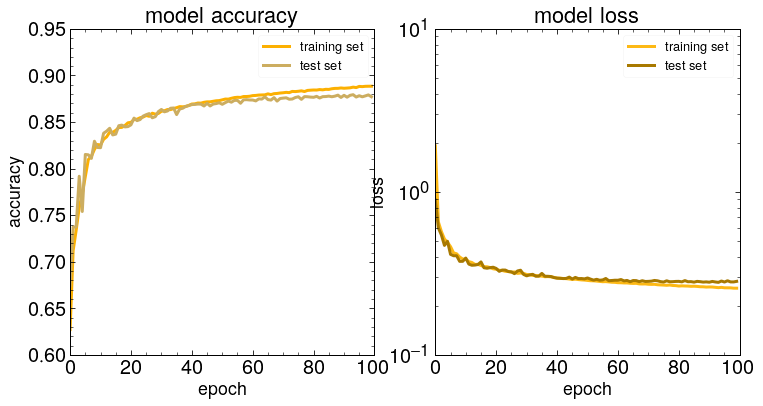

In [6]:
histplots(histnog)

In [17]:
#first run a model with only eta as global F var
#X_glob_train_1 = np.array(eta_train)
#X_glob_vali_1 = np.array(eta_val)
X_glob_test_1 = np.array(eta_test)

In [6]:
#history = GlobalModel(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_train_1, X_glob_vali_1, X_glob_test_1, 100, 1000, 1, 'w8_pfn_noID.hdf5', 100)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100       activation[0][0]                 
______________________________________________________________________________________________

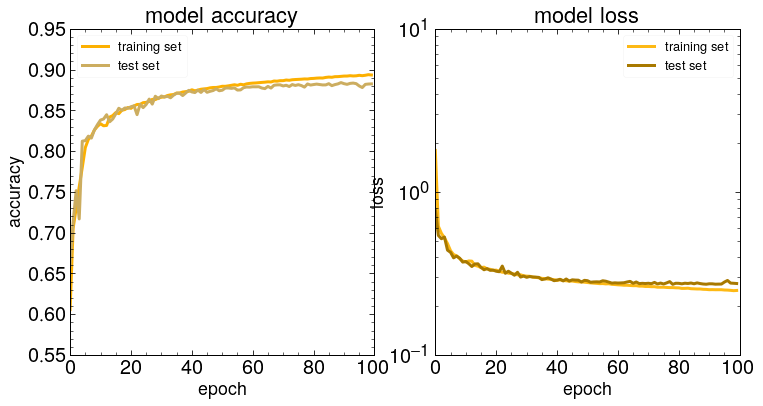

In [7]:
histplots(history)

In [15]:
noID_model = tf.keras.models.load_model(data_path+'w8_pfn_noID.hdf5')

In [7]:
eta_ranges, eta_sel, _,_,_,_,_,_ = make_ranges(eta_test, ET_test, Pt_test, Eng_test)

NameError: name 'ET_test' is not defined

In [18]:
fps_noid_eta, tps_noid_eta, auc_noid_eta = metrics(noID_model, X_test, X_glob_test_1, Y_test, eta_sel)

PFN AUC: 0.9673720965655478
PFN AUC: 0.9737930672749256
PFN AUC: 0.9717529828885793
PFN AUC: 0.9717779542473279
PFN AUC: 0.9706398479482959
PFN AUC: 0.9682665060009704
PFN AUC: 0.9747942752883597
PFN AUC: 0.9713209264044073
PFN AUC: 0.970460595836482
PFN AUC: 0.9701187454597388
PFN AUC: 0.9736620008878842
PFN AUC: 0.9717267401861808
PFN AUC: 0.9657295444416925
PFN AUC: 0.947056202442897
PFN AUC: 0.8910491607358189
PFN AUC: 0.9162024724650646
PFN AUC: 0.9392978547836593
PFN AUC: 0.9230099365190361
PFN AUC: 0.922138319887638
PFN AUC: 0.920353423882793
PFN AUC: 0.9336002315533634
PFN AUC: 0.9429646159052305
PFN AUC: 0.9430276419536854
PFN AUC: 0.9403375583881436
PFN AUC: 0.9291418946097167
PFN AUC: 0.9498074427698432
PFN AUC: 0.9779974215119072
PFN AUC: 0.9768061681288859
PFN AUC: 0.9815405695249926
PFN AUC: 0.9808043358307931
PFN AUC: 0.9543965468796821


In [19]:
reg95_noid_eta = interp95(fps_noid_eta, tps_noid_eta)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


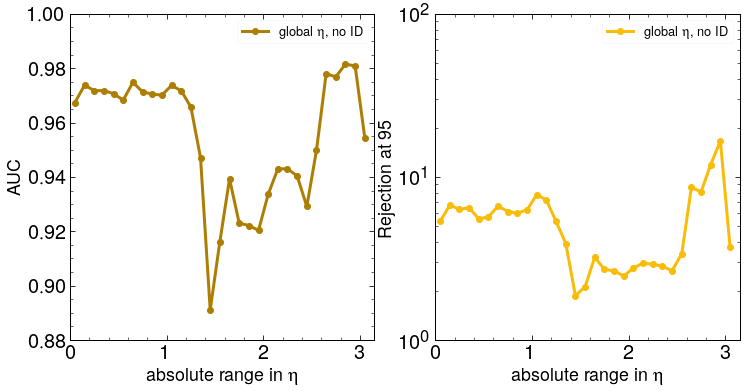

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_noid_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$, no ID')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_noid_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='global $\eta$, no ID')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

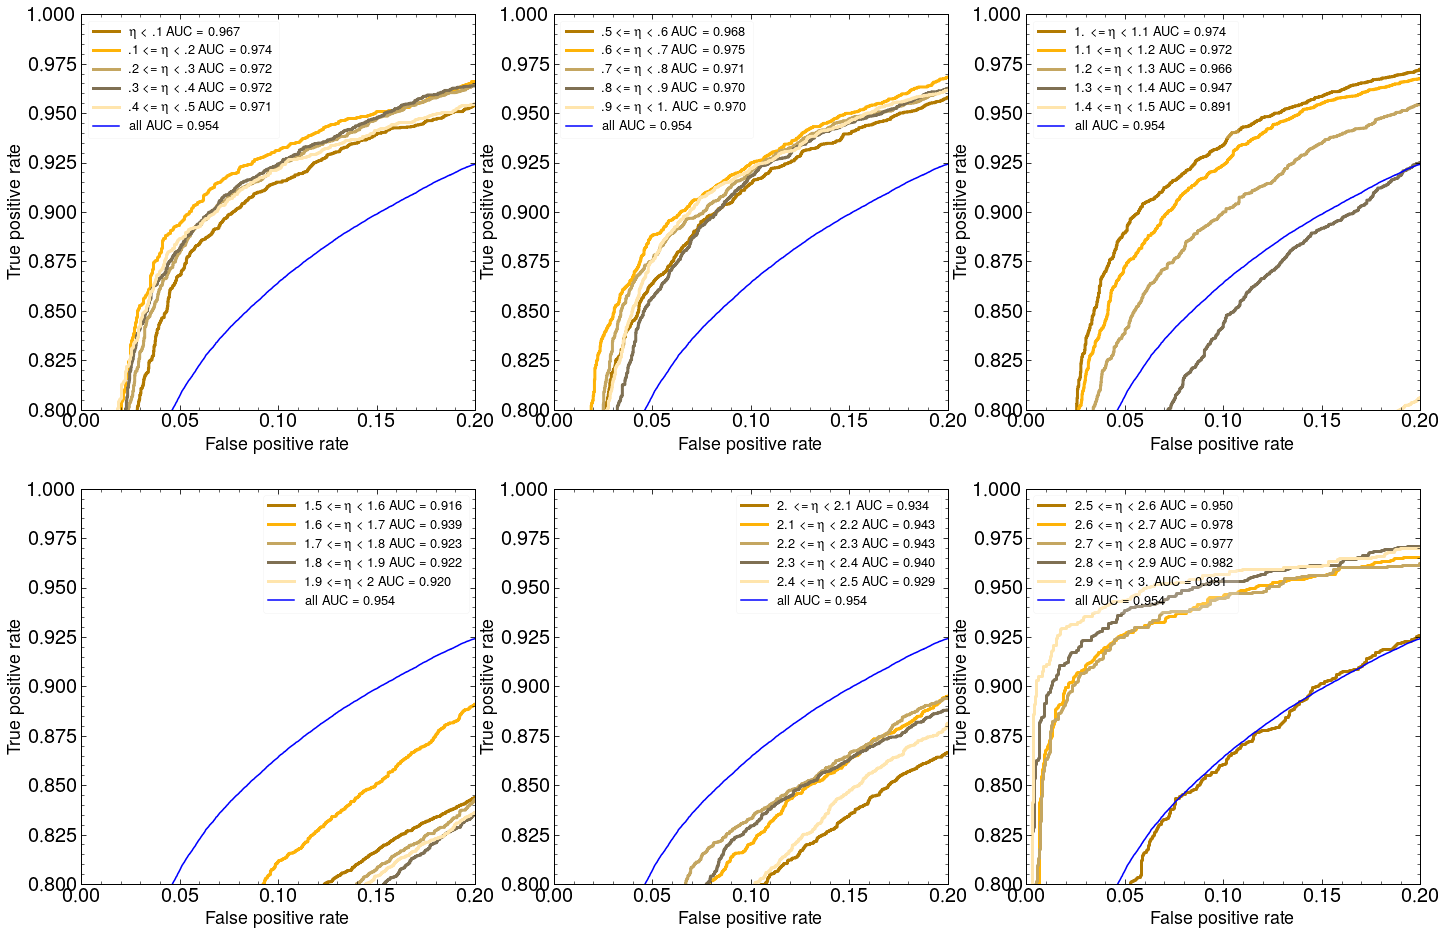

In [13]:
AUCplot(eta_ranges, fps_eta, tps_eta, auc_eta, rangetype='eta')

In [13]:
other = np.load(data_path+'w8_modelmetrics2plot.npz', allow_pickle=True) #okay this way works!!!!

In [14]:
fps_gp_eta, tps_gp_eta, auc_gp_eta, fps_ng_eta, tps_ng_eta, auc_ng_eta, fps_eta, tps_eta, auc_eta, reg95_ng_eta, reg95_gp_eta, reg95_eta, eta_sel2 =other['arr_0'], other['arr_1'], other['arr_2'],other['arr_3'], other['arr_4'], other['arr_5'], other['arr_6'], other['arr_7'], other['arr_8'], other['arr_9'], other['arr_10'], other['arr_11'], other['arr_12']

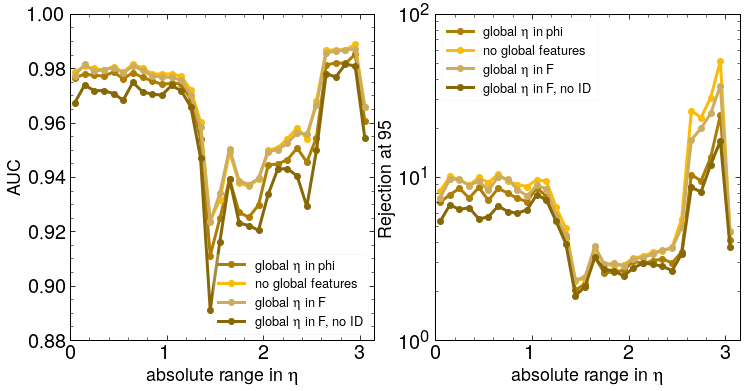

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax1.plot(eta_ranges, auc_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax1.plot(eta_ranges, auc_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
ax1.plot(eta_ranges, auc_noid_eta, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in F, no ID')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_gp_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in phi')
ax2.plot(eta_ranges, reg95_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax2.plot(eta_ranges, reg95_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F')
ax2.plot(eta_ranges, reg95_noid_eta, linewidth=3, c='xkcd:muddy brown', marker='o', label='global $\eta$ in F, no ID')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

In [5]:
#note I want to make a model with no samlping and NO global features in order to see if the eta dependence is added by the sampling ID

In [6]:
nog_noid = tf.keras.models.load_model(data_path+'w9_pfn_noid_nog.hdf5')

In [9]:
eta_ranges = np.arange(0., 3.1, .1)+.05

selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

eta_sel = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

In [10]:
fps_noidnog, tps_noidnog, auc_noidnog = metrics_ng(nog_noid, X_test, Y_test, eta_sel)

PFN AUC: 0.9663666193522561
PFN AUC: 0.9725919406500578
PFN AUC: 0.9709806872236266
PFN AUC: 0.9713337215663437
PFN AUC: 0.9696225619604796
PFN AUC: 0.9671721166816847
PFN AUC: 0.9727421453132219
PFN AUC: 0.9701225182494444
PFN AUC: 0.969391040070191
PFN AUC: 0.9699663748850976
PFN AUC: 0.9724365853407863
PFN AUC: 0.9705010446888093
PFN AUC: 0.964827548376435
PFN AUC: 0.9463129712749944
PFN AUC: 0.8791734365539876
PFN AUC: 0.9121434556842107
PFN AUC: 0.9337055948540826
PFN AUC: 0.9200959827617768
PFN AUC: 0.9247700605184159
PFN AUC: 0.9220675491227281
PFN AUC: 0.9333222992037161
PFN AUC: 0.9426947702468935
PFN AUC: 0.944407910682279
PFN AUC: 0.9413014360731942
PFN AUC: 0.9297416186932588
PFN AUC: 0.9515095339757021
PFN AUC: 0.9789608097459335
PFN AUC: 0.9770485451867955
PFN AUC: 0.98096318163525
PFN AUC: 0.9813395720337305
PFN AUC: 0.9524527312808693


In [11]:
reg95_noidnog = interp95(fps_noidnog, tps_noidnog)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


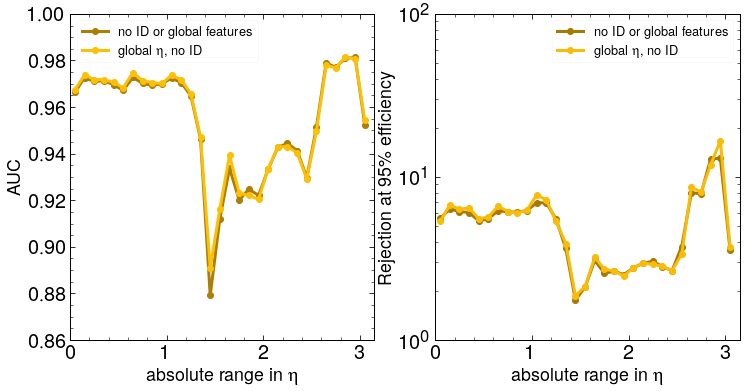

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_noidnog, linewidth=3, c='xkcd:mustard brown', marker='o', label='no ID or global features')
ax1.plot(eta_ranges, auc_noid_eta, linewidth=3, c='xkcd:marigold', marker='o', label='global $\eta$, no ID')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_noidnog, linewidth=3, c='xkcd:bronze', marker='o', label='no ID or global features')
ax2.plot(eta_ranges, reg95_noid_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='global $\eta$, no ID')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95\% efficiency')
ax2.legend()

In [14]:
#the global eta in F model
model_glob = tf.keras.models.load_model(data_path+'w6_pfn_bigtest.hdf5')

#the no global features model:
model_nog = tf.keras.models.load_model(data_path+'w6_pfn_noglob.hdf5')


In [18]:
#get X for the other two models:
file2 = np.load(data_path+'nn_splitdata_w7_2.npz')

In [19]:
X_test2 = file2['arr_2']
Y_test2 = file2['arr_5']

In [20]:
fps_ng_eta, tps_ng_eta, auc_ng_eta = metrics_ng(X_test2, Y_test2, eta_sel)

PFN AUC: 0.9663858409430214
PFN AUC: 0.9636652896965737
PFN AUC: 0.967581707773362
PFN AUC: 0.9647129964072508
PFN AUC: 0.9655753715958467
PFN AUC: 0.9673577626130544
PFN AUC: 0.9648647580563906
PFN AUC: 0.9684941513310454
PFN AUC: 0.9651927388299982
PFN AUC: 0.9660612776769624
PFN AUC: 0.9679850596425331
PFN AUC: 0.965857993232454
PFN AUC: 0.9677716120291249
PFN AUC: 0.9652963906404234
PFN AUC: 0.9669346944508848
PFN AUC: 0.96566685488616
PFN AUC: 0.9654886114422676
PFN AUC: 0.9645715145549711
PFN AUC: 0.966874846428511
PFN AUC: 0.9650342037005897
PFN AUC: 0.9654960768923317
PFN AUC: 0.9653098128991181
PFN AUC: 0.9628270874072027
PFN AUC: 0.9678500157415257
PFN AUC: 0.963476557821302
PFN AUC: 0.965008375552719
PFN AUC: 0.9676267396720042
PFN AUC: 0.965756178980413
PFN AUC: 0.9650899643899465
PFN AUC: 0.9634524392233643
PFN AUC: 0.965879118913511


In [21]:
fps_eta, tps_eta, auc_eta = metrics(model_glob, X_test2, X_glob_test_1, Y_test2, eta_sel)

PFN AUC: 0.9351425614346819
PFN AUC: 0.9313909980052008
PFN AUC: 0.9386529166627438
PFN AUC: 0.933790443057259
PFN AUC: 0.938445605690859
PFN AUC: 0.9422899980930586
PFN AUC: 0.9414858961499649
PFN AUC: 0.9472819355438822
PFN AUC: 0.9481678955350487
PFN AUC: 0.9499250421230325
PFN AUC: 0.9552338250404687
PFN AUC: 0.9551625741703047
PFN AUC: 0.9595613636798834
PFN AUC: 0.9551608778378903
PFN AUC: 0.9557298849844642
PFN AUC: 0.9557695270555093
PFN AUC: 0.9536275029992418
PFN AUC: 0.952219359359093
PFN AUC: 0.9531190948434201
PFN AUC: 0.9511163355384857
PFN AUC: 0.9476179778464253
PFN AUC: 0.9484130138802317
PFN AUC: 0.9411853164370373
PFN AUC: 0.9454178209064121
PFN AUC: 0.9381420477696059
PFN AUC: 0.9362727939980366
PFN AUC: 0.9425908678773579
PFN AUC: 0.9412581244196843
PFN AUC: 0.9332649536815205
PFN AUC: 0.929852533279587
PFN AUC: 0.9463165615896784


In [22]:
reg95_ng_eta = interp95(fps_ng_eta, tps_ng_eta)
reg95_eta = interp95(fps_eta, tps_eta)

/home/kaelaekd/start_tf/LCStudies/classifier/Week7_PFNutils.py:79: RuntimeWarning: divide by zero encountered in true_divide
  fg.append(interp1d(tps[i], 1/fps[i]))


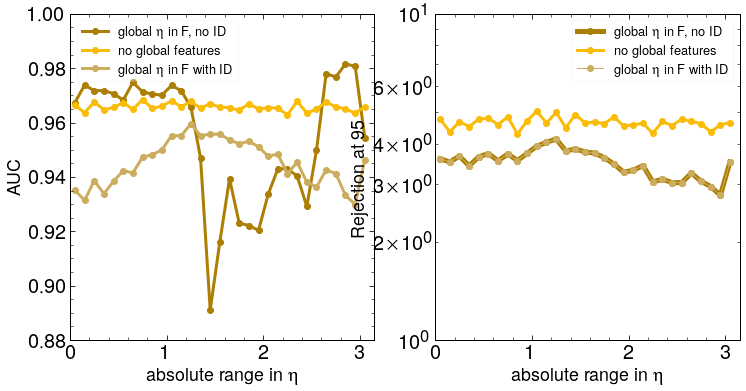

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12,6])

ax1.set_xlim(0., max(eta_ranges)+.1)
ax1.plot(eta_ranges, auc_noid_eta, linewidth=3, c='xkcd:mustard brown', marker='o', label='global $\eta$ in F, no ID')
ax1.plot(eta_ranges, auc_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax1.plot(eta_ranges, auc_eta, linewidth=3, c='xkcd:desert', marker='o', label='global $\eta$ in F with ID')
ax1.set_xlabel('absolute range in $\eta$')
ax1.set_ylabel('AUC')
ax1.legend()

ax2.semilogy()
ax2.set_xlim(0., max(eta_ranges)+.1)
ax2.plot(eta_ranges, reg95_noid_eta, linewidth=5, c='xkcd:mustard brown', marker='o', label='global $\eta$ in F, no ID')
ax2.plot(eta_ranges, reg95_ng_eta, linewidth=3, c='xkcd:golden rod', marker='o', label='no global features')
ax2.plot(eta_ranges, reg95_eta, linewidth=1, c='xkcd:desert', marker='o', label='global $\eta$ in F with ID')
ax2.set_xlabel('absolute range in $\eta$')
ax2.set_ylabel('Rejection at 95% efficiency')
ax2.legend()

In [ ]:
#^ why does that look so weird???? that is not right.... let's try just putting this model in the other notebook....